**Увеличение покупательской активности постоянные клиетов.**

**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Подход к решению задачи**

**1.** Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».


**2.** Нужно собрать данные по клиентам по следующим группам:
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

**3.** Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.


**4.** В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

**5.** Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.


**Описание данных**

market_file.csv. Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


market_money.csv. Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.


- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.


market_time.csv. Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.


- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
минут — значение времени, проведённого на сайте, в минутах.


money.csv. Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.


- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

**В ходе выполнения работы потребуется выполнить следующие действия:**


- Загрузить данные;
- Выполнить предобработку данных;
- Провести исследовательский анализ данных;
- Объединить таблицы;
- Провести корреляционный анализ;
- Использовать пайплайны для подготовки данных и обучение нескольких моделей, выбрать лучшую модель;
- Проанализировать важности признаков;
- Сегментировать покупателей,  предложить, как увеличить покупательскую активность группы;
- Написать итоговый вывод.

In [1]:
!pip install phik -q
!pip install --upgrade scikit-learn -q
!pip install imbalanced-learn -q
!pip install shap -q

import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import phik
import shap

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline 

from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


RANDOM_STATE = 42
TEST_SIZE = 0.25

#### Шаг 1. Загрузка данных.

##### Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним его в датафрейм

In [2]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

##### Изучим информацию о датафреймах

In [3]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [4]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [5]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [6]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [7]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [8]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [9]:
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [10]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


**Пропусков в данных обнаружено не было. Типы данных соответствуют действительности.**

#### Шаг 2. Предобработка данных.

##### Изменим название столбцов

In [11]:
market_file.columns = market_file.columns.str.lower().str.replace(r'\W+', '_', regex=True)
market_money.columns = market_money.columns.str.lower().str.replace(r'\W+', '_', regex=True)
market_time.columns = market_time.columns.str.lower().str.replace(r'\W+', '_', regex=True)
money.columns = money.columns.str.lower().str.replace(r'\W+', '_', regex=True)

##### Проверим на наличие пропусков и дубликатов

In [12]:
def skips_dulicates(data):
    total_missing = data.isna().sum().sum()
    if total_missing > 0:
        print(f"Пропуски найдены, общее количество пропусков: {total_missing}")
        print("Пропуски по столбцам:")
        print(data.isna().sum())
    else:
        print("Пропусков нет.")
    duplicate_count = data.duplicated().sum()
    if duplicate_count > 0:
        print(f"Количество явных дубликатов: {duplicate_count}")
    else:
        print("Дубликатов нет.")
    return data

In [13]:
def unique_values(data):
    unique_dict = {}  
    for column in data.columns:
        if data[column].dtype == 'object':
            data[column] = data[column].str.lower()
            unique_dict[column] = data[column].unique() 
    return unique_dict

In [14]:
skips_dulicates(market_file);

Пропусков нет.
Дубликатов нет.


In [15]:
skips_dulicates(market_money);

Пропусков нет.
Дубликатов нет.


In [16]:
skips_dulicates(market_time);

Пропусков нет.
Дубликатов нет.


In [17]:
skips_dulicates(money);

Пропусков нет.
Дубликатов нет.


Пропусков и явных дубликатов нет, проверим на наличие неявных дубликатов.

In [18]:
unique_values(market_file)

{'покупательская_активность': array(['снизилась', 'прежний уровень'], dtype=object),
 'тип_сервиса': array(['премиум', 'стандартт', 'стандарт'], dtype=object),
 'разрешить_сообщать': array(['да', 'нет'], dtype=object),
 'популярная_категория': array(['товары для детей', 'домашний текстиль', 'косметика и аксесуары',
        'техника для красоты и здоровья', 'кухонная посуда',
        'мелкая бытовая техника и электроника'], dtype=object)}

Можно заметить дубликат - 'стандартт', 'стандарт'. Также есть ошибка в слове аксессуары.

In [19]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace({'стандартт': 'стандарт'})
market_file['популярная_категория'] = market_file['популярная_категория'].replace({'косметика и аксесуары': 'косметика и аксессуары'})

In [20]:
unique_values(market_money)

{'период': array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
       dtype=object)}

In [21]:
unique_values(market_time)

{'период': array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)}

Есть орфографическая ошибка в слове предыдущий.

In [22]:
market_time['период'] = market_time['период'].replace({'предыдцщий_месяц': 'предыдущий_месяц'})

In [23]:
unique_values(money)

{}

**Пропусков и явных дубликатов в данных нет, бил найден неявный дубликат, а также устранены орфографические ошибки**

#### Шаг 3. Исследовательский анализ данных

In [24]:
def num_variable_analysis(data, column, title):
    print(data[column].describe())
    fig, ax = plt.subplots(figsize = (17,2))
    ax = data[[column]].boxplot(vert = False, ax =ax)
    ax.set_title(f'Диаграмма размаха {title}')
    plt.show()

In [25]:
def num_variable_visualization(data, column, title, x_title):
    unique_values = data[column].nunique()
    is_discrete = unique_values <= 20 and (data[column].dtype == 'int64' and (data[column] % 1 == 0).all())

    if is_discrete:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, data=data, palette='pastel', edgecolor='black')
        plt.title(title)
        plt.xlabel(x_title)
        plt.ylabel('Количество')
    else:
        data = data[column].plot(title=title, kind='hist', bins=25, grid=True, 
                                             figsize=(10,6), color='skyblue', edgecolor='black')
        data.set_xlabel(x_title)
        data.set_ylabel('Количество клиентов')
    plt.show()

In [26]:
def cat_variable_visualization(data, column, title, ax):
    value_counts = data[column].value_counts()
    labels = value_counts.index
    sizes = value_counts.values

    ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors,
        wedgeprops={'edgecolor': 'black'}
    )
    ax.set_title(title, fontsize=14)

##### Изучим количественные признаки market_file

В market_file количествеенными признаками являются:

- маркет_актив_6_мес;
- маркет_актив_тек_мес;
- длительность;
- акционные_покупки;
- средний_просмотр_категорий_за_визит;
- неоплаченные_продукты_штук_квартал;
- ошибка_сервиса;
- cтраниц_за_визит; 

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64


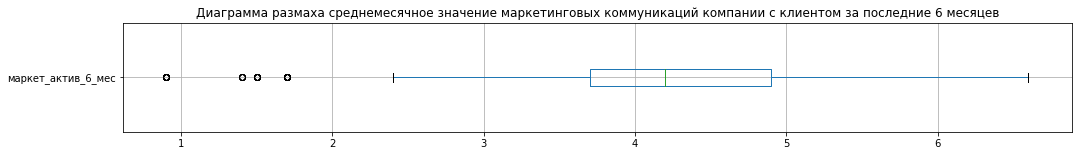

In [27]:
num_variable_analysis(market_file, 'маркет_актив_6_мес', 'среднемесячное значение маркетинговых коммуникаций компании c клиентом за последние 6 месяцев')

In [28]:
unique_values_active_6_months = market_file['маркет_актив_6_мес'].unique()
unique_values_active_6_months 

array([3.4, 4.4, 4.9, 3.2, 5.1, 3.3, 4.7, 4.2, 3.9, 4.6, 4.3, 3.8, 2.7,
       4.8, 2.9, 3. , 2.4, 1.7, 3.6, 4. , 1.5, 3.5, 4.1, 3.1, 1.4, 0.9,
       5.6, 2.6, 5.5, 5.2, 5.8, 5. , 5.4, 5.7, 5.3, 3.7, 6.3, 6.6, 4.5,
       6.1, 5.9])

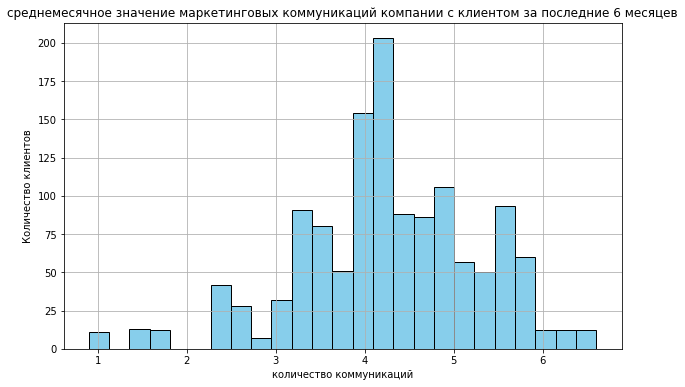

In [29]:
num_variable_visualization(market_file, 'маркет_актив_6_мес', 'среднемесячное значение маркетинговых коммуникаций компании c клиентом за последние 6 месяцев', 'количество коммуникаций')

Некторое количество значений уходит за пределы первого квантиля (пока не будем удалять эти значения, так как они вполне реальны), наблюдается смещение гистограммы вправо.

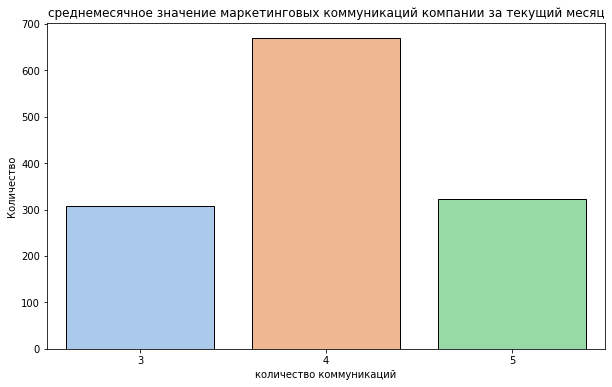

In [30]:
num_variable_visualization(market_file, 'маркет_актив_тек_мес', 'среднемесячное значение маркетинговых коммуникаций компании за текущий месяц', 'количество коммуникаций')

Стоит сделать из данного количественного признака категориальный.
низкий, средний, высокий

In [31]:
market_file['маркет_актив_тек_мес_cat'] =  market_file['маркет_актив_тек_мес'].apply(lambda x : 'низкий' if x < 3.5 
                                                                                     else 'средний' if x <= 4.5 else 'высокий'
)

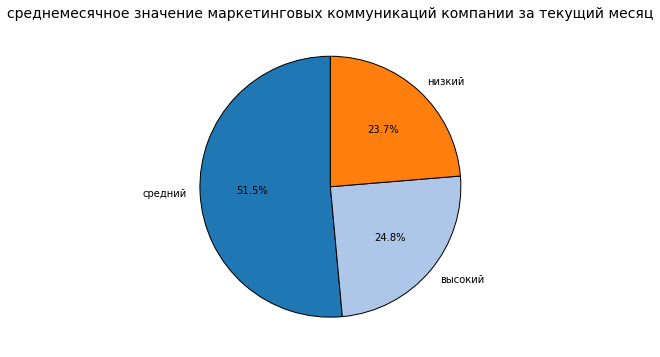

In [32]:
fig, ax = plt.subplots(figsize=(6, 6))
cat_variable_visualization(market_file, 'маркет_актив_тек_мес_cat', 'cреднемесячное значение маркетинговых коммуникаций компании за текущий месяц', ax)

Половину составляет среднее количестов коммуникаций, низкий и высокий распределены практически одинаково

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64


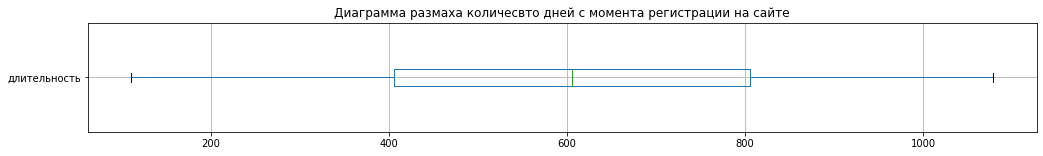

In [33]:
num_variable_analysis(market_file, 'длительность', 'количесвто дней с момента регистрации на сайте')

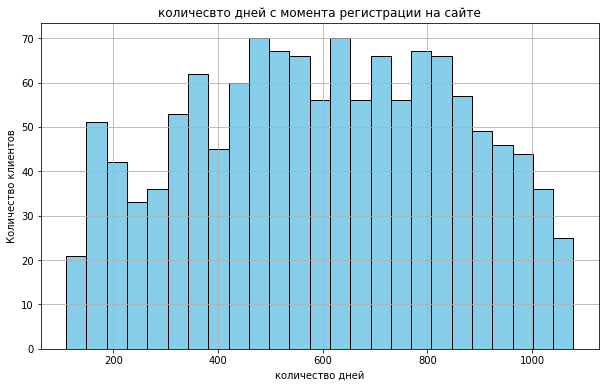

In [34]:
num_variable_visualization(market_file, 'длительность', 'количесвто дней с момента регистрации на сайте', 'количество дней')

Распределение похоже на равномерное, можно сказать, что в среднем каждый день регистрируется одинаковое количество человек.


count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64


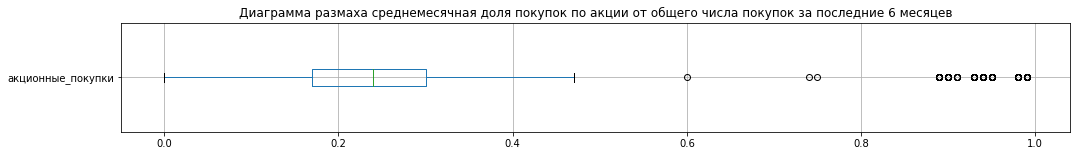

In [35]:
num_variable_analysis(market_file, 'акционные_покупки', 'среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев')

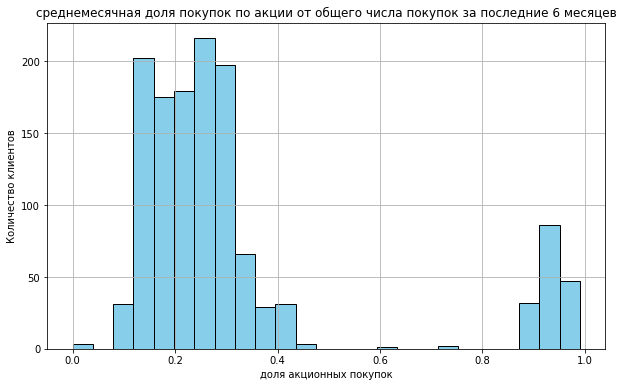

In [36]:
num_variable_visualization(market_file, 'акционные_покупки', 'среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев', 'доля акционных покупок')

Стоит изменить этот признак на категориальный, так как явно выраженно два участка.

In [37]:
market_file['акционные_покупки_cat'] =  market_file['акционные_покупки'].apply(lambda x : 'низкая доля' if x < 0.6 
                                                                                     else 'высокая доля')

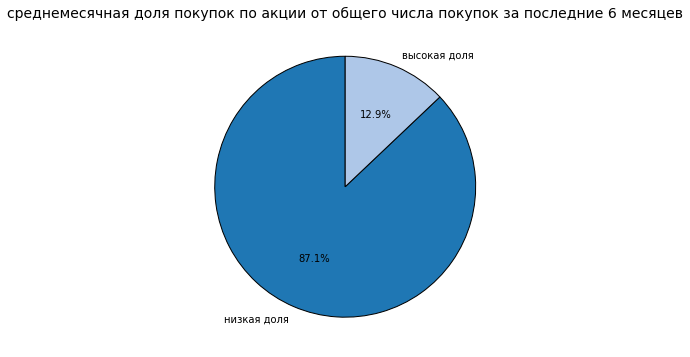

In [38]:
fig, ax = plt.subplots(figsize=(6, 6))
cat_variable_visualization(market_file, 'акционные_покупки_cat', 'среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев', ax)

Наблюдается сильный дисбаланс в сторону низкой доли.

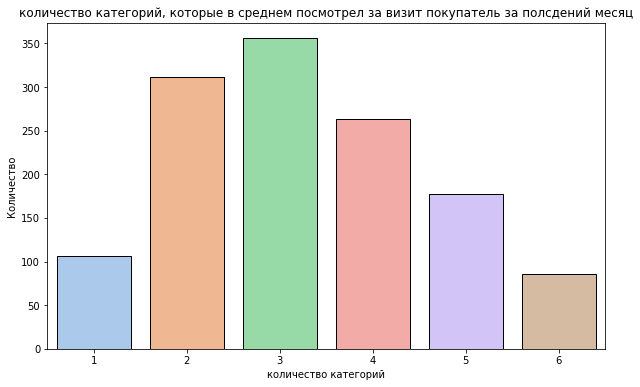

In [39]:
num_variable_visualization(market_file, 'средний_просмотр_категорий_за_визит', 'количество категорий, которые в среднем посмотрел за визит покупатель за полсдений месяц', 'количество категорий')

Все значения данного признака в пределах нормы, дополнительные изменения не требуются.

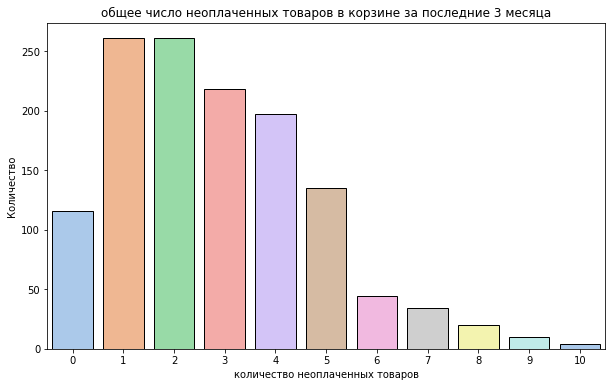

In [40]:
num_variable_visualization(market_file, 'неоплаченные_продукты_штук_квартал', 'общее число неоплаченных товаров в корзине за последние 3 месяца', 'количество неоплаченных товаров')

У данного признака наблюдается сильное смещение влево.

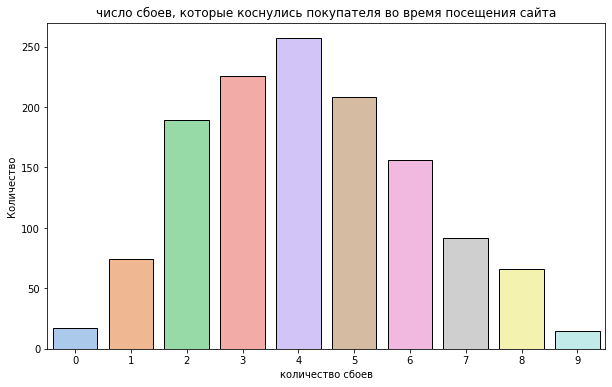

In [41]:
num_variable_visualization(market_file, 'ошибка_сервиса', 'число сбоев, которые коснулись покупателя во время посещения сайта', 'количество сбоев')

Распределение похоже на нормальное.

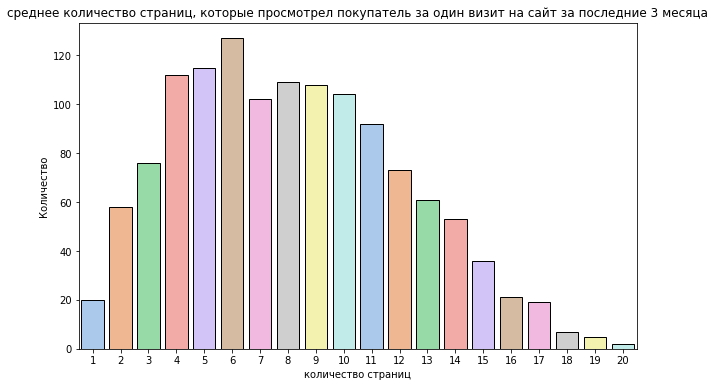

In [42]:
num_variable_visualization(market_file, 'страниц_за_визит', 'среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца', 'количество страниц')

Можно попробовать преобразавать данный признак в категориальный.

In [43]:
market_file['страниц_за_визит_cat'] = market_file['страниц_за_визит'].apply( lambda x: '0-4 страницы: Низкий интерес'
                                                                            if x <= 4 else '5-9 страниц: Средний интерес'
                                                                            if 5 <= x <= 9 else '10+ страниц: Высокий интерес' )

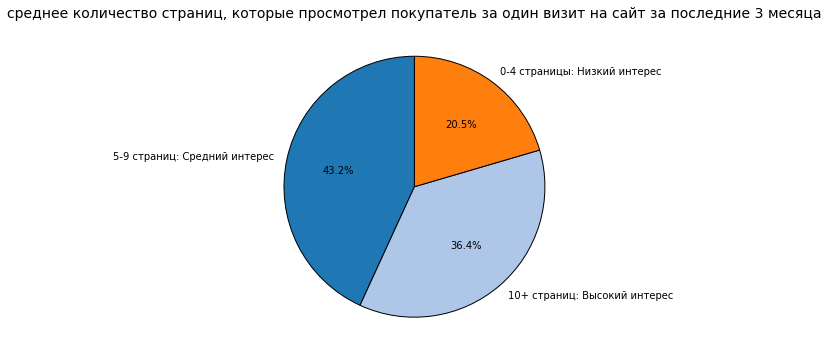

In [44]:
fig, ax = plt.subplots(figsize=(6, 6))
cat_variable_visualization(market_file, 'страниц_за_визит_cat', 'среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца', ax)

##### Изучим качественные признаки market_file

В market_file количествеенными признаками являются:

- покупательская_активность;
- тип_сервиса;
- разрешить_сообщать;
- популярная_категория

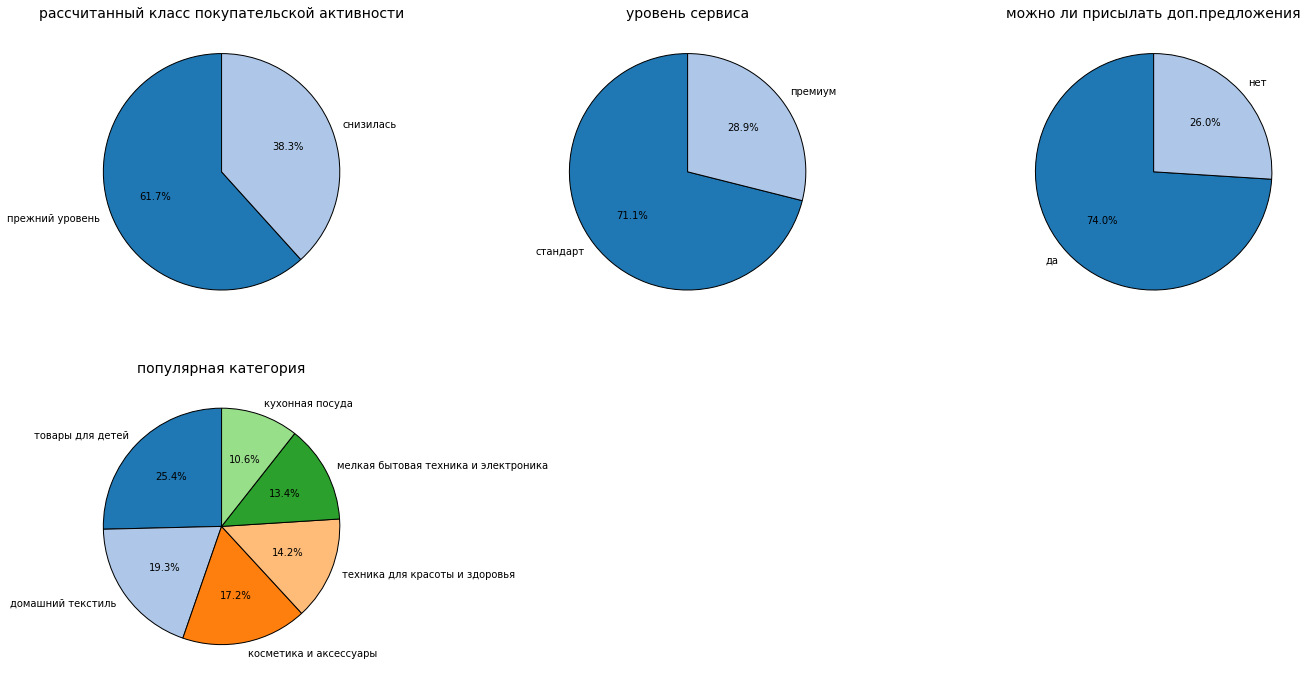

In [45]:
columns = [ 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']  
titles = ['рассчитанный класс покупательской активности', 'уровень сервиса', 'можно ли присылать доп.предложения', 'популярная категория']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  

axes = axes.flatten()

for i, ax in enumerate(axes[:len(columns)]): 
    cat_variable_visualization(market_file, columns[i], titles[i], ax)

for ax in axes[len(columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

В целевой переменно наблюдается смещение в сторону прежнего уровня покупательской активности. Возможно смещение модели, метрика accuracy в данном случае может оказаться неточной. В уровне серивича преобладает стандарт, в основном присылать дополнительный предложения можно. Самой популярной категорией является товары для детей.

##### Изучим количественные признаки market_money

В данном датафрейме количественным признаком является только выручка.

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64


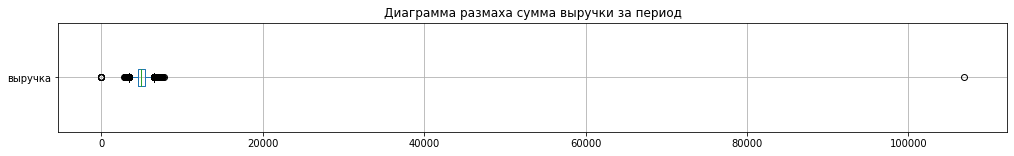

In [46]:
num_variable_analysis(market_money, 'выручка', 'сумма выручки за период')

Скорее всего выручка больше 100000 аномальное значение, лучше его удалить.

count    3899.00000
mean     4999.57743
std       706.99988
min         0.00000
25%      4590.10000
50%      4957.00000
75%      5363.00000
max      7799.40000
Name: выручка, dtype: float64


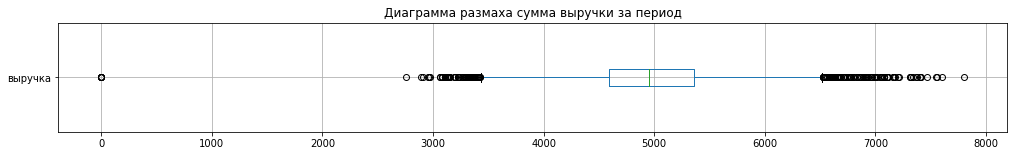

In [47]:
market_money = market_money[market_money['выручка'] < 100000]
num_variable_analysis(market_money, 'выручка', 'сумма выручки за период')

In [48]:
market_money[market_money['выручка'] == 0].shape[0]

6

Есть строки с 0 приболью, но это вполне возможно, не будем их исключать.

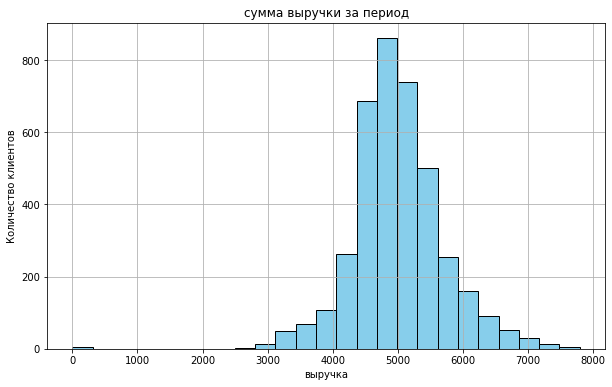

In [49]:
num_variable_visualization(market_money, 'выручка', 'сумма выручки за период', 'выручка')

Распределение нормальное, есть значение с 0 приболью.

##### Изучим качественные признаки market_money

В данном датафрейме присутствует только один количественный признак период.

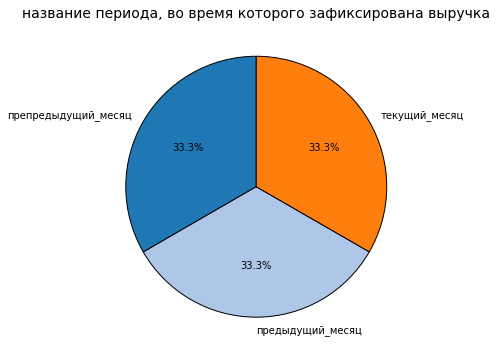

In [50]:
fig, ax = plt.subplots(figsize=(6, 6))
cat_variable_visualization(market_money, 'период', 'название периода, во время которого зафиксирована выручка', ax)

Данный признак расперделен полностью равномерно.

##### Изучим количественные признаки market_time

Только один количественный признак - минут.

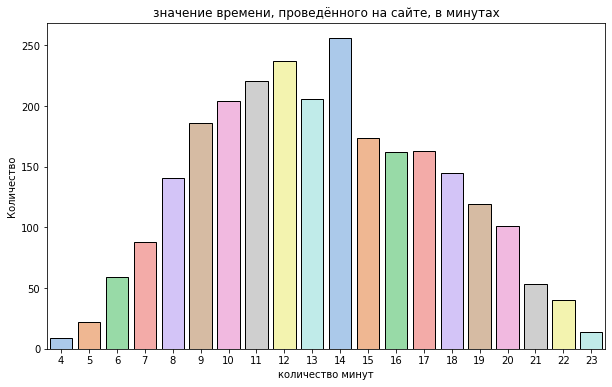

In [51]:
num_variable_visualization(market_time, 'минут', 'значение времени, проведённого на сайте, в минутах', 'количество минут')

Распределение похоже на нормальное

##### Изучим качественные признаки market_time

В датафрейме только один категориальный признак - период.

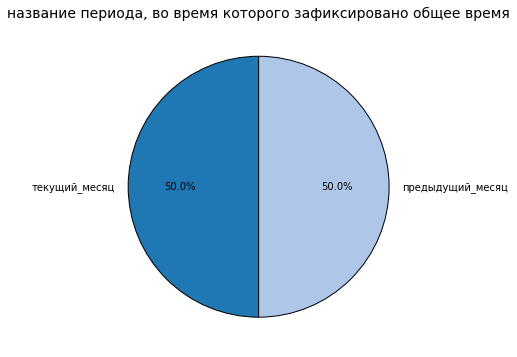

In [52]:
fig, ax = plt.subplots(figsize=(6, 6))
cat_variable_visualization(market_time, 'период', 'название периода, во время которого зафиксировано общее время', ax)

Данный признак распределен равномерно.

##### Изучим количественный признаки money

Только один признак - прибыль.

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64


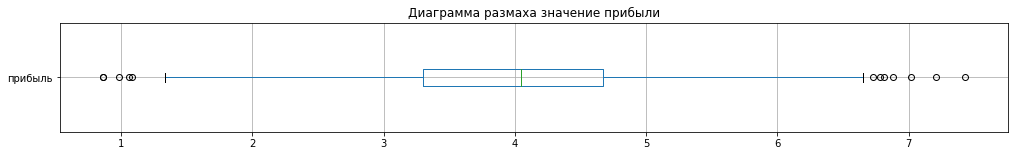

In [53]:
num_variable_analysis(money, 'прибыль', 'значение прибыли')

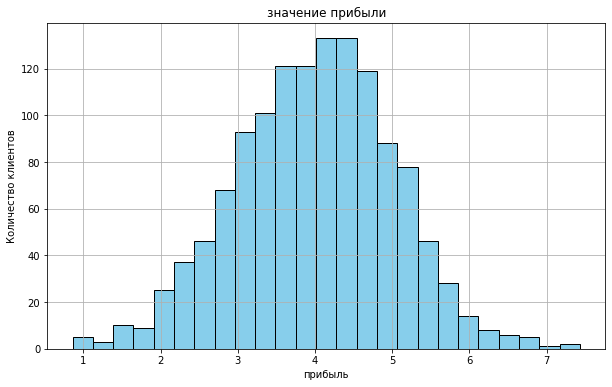

In [54]:
num_variable_visualization(money, 'прибыль', 'значение прибыли', 'прибыль')

Распределение похоже на нормальное.

##### Отбор клиентов с покупательской активностью не менее трёх месяцев

Для отбора таких клиентов воспользуемся таблицей market_money.

In [55]:
inactive_users = market_money[market_money['выручка'] == 0]
inactive_users

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [56]:
inactive_ids = market_money.loc[market_money['выручка'] == 0, 'id']

market_file = market_file[~market_file['id'].isin(inactive_ids)]
market_money = market_money[~market_money['id'].isin(inactive_ids)]
market_time = market_time[~market_time['id'].isin(inactive_ids)]
money = money[~money['id'].isin(inactive_ids)]

**В ходе исследовательского анализа дыннх были изучены количественные и категориальные признаки датафреймов. Для некторых количественных признакаков был добавлен из качественный признак. Кроме этого были удалены неактивные пользователи.**

#### Шаг 4. Объединение таблиц

Объединение таблиц market_file.csv, market_money.csv, market_time.csv. 

In [57]:
merged_df = market_file

for period in market_money['период'].unique():
    period_data = market_money[market_money['период'] == period]
    period_data = period_data.drop(columns=['период'])
    period_data = period_data.rename(columns={'выручка': f'выручка_{period}'})
    merged_df = merged_df.merge(period_data, on='id', how='left')

for period in market_time['период'].unique():
    period_data = market_time[market_time['период'] == period]
    period_data = period_data.drop(columns=['период'])
    period_data = period_data.rename(columns={'минут': f'время_на_сайте_{period}'})
    merged_df = merged_df.merge(period_data, on='id', how='left')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская_активность            1297 non-null   object 
 2   тип_сервиса                          1297 non-null   object 
 3   разрешить_сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                

In [58]:
merged_df.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
маркет_актив_тек_мес_cat               0
акционные_покупки_cat                  0
страниц_за_визит_cat                   0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  1
выручка_предыдущий_месяц               0
время_на_сайте_текущий_месяц           0
время_на_сайте_предыдущий_месяц        0
dtype: int64

In [59]:
merged_df = merged_df.dropna()

In [60]:
merged_df.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,...,ошибка_сервиса,страниц_за_визит,маркет_актив_тек_мес_cat,акционные_покупки_cat,страниц_за_визит_cat,выручка_препредыдущий_месяц,выручка_текущий_месяц,выручка_предыдущий_месяц,время_на_сайте_текущий_месяц,время_на_сайте_предыдущий_месяц
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,...,2,5,средний,высокая доля,5-9 страниц: Средний интерес,4472.0,4971.6,5216.0,10,12
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,...,1,5,низкий,низкая доля,5-9 страниц: Средний интерес,4826.0,5058.4,5457.5,13,8
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,...,6,4,высокий,высокая доля,0-4 страницы: Низкий интерес,4793.0,6610.4,6158.0,13,11
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,...,3,2,низкий,высокая доля,0-4 страницы: Низкий интерес,4594.0,5872.5,5807.5,11,8
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,...,1,4,средний,низкая доля,0-4 страницы: Низкий интерес,5124.0,5388.5,4738.5,10,10


#### Шаг 5. Корреляционный анализ

##### Построение матрицы корреляции в количественной шкале

In [61]:
merged_df.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'маркет_актив_тек_мес_cat', 'акционные_покупки_cat',
       'страниц_за_визит_cat', 'выручка_препредыдущий_месяц',
       'выручка_текущий_месяц', 'выручка_предыдущий_месяц',
       'время_на_сайте_текущий_месяц', 'время_на_сайте_предыдущий_месяц'],
      dtype='object')

In [62]:
interval_cols = [
    'маркет_актив_6_мес',
    'длительность',
    'акционные_покупки',
    'выручка_препредыдущий_месяц',
    'выручка_текущий_месяц',
    'выручка_предыдущий_месяц',
]

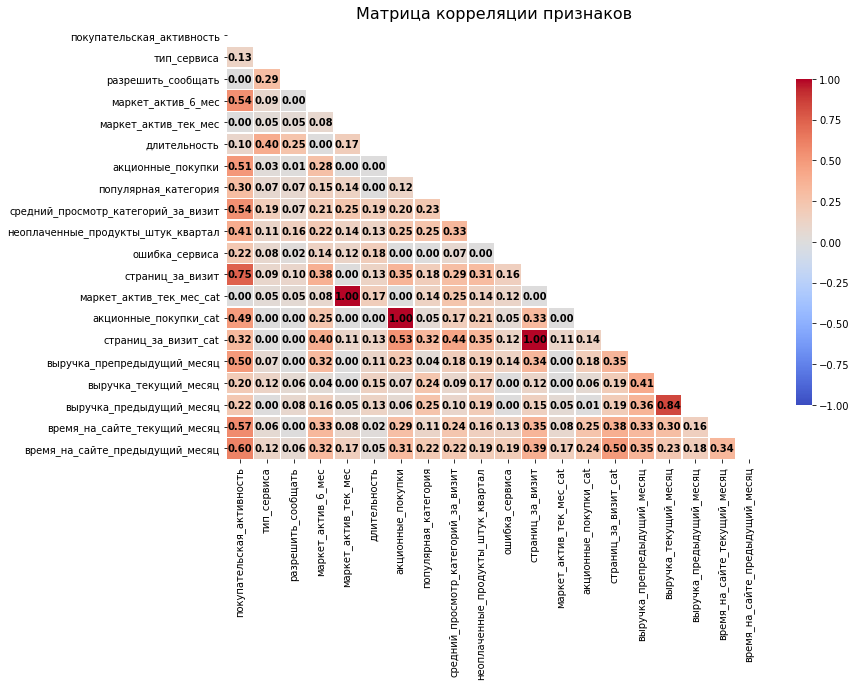

In [63]:
phik_matrix = merged_df.drop('id', axis=1).phik_matrix(interval_cols=interval_cols)
mask = np.triu(np.ones_like(phik_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(
    phik_matrix,
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",     
    mask=mask,          
    linewidths=0.5,     
    cbar_kws={"shrink": 0.75},  
    vmin=-1, vmax=1,     
    annot_kws={"size": 10, "weight": "bold", "color": "black"}  
)

plt.title("Матрица корреляции признаков", fontsize=16)
plt.show()

Наибольшая корреляция с целевым пртзнаком:
- "маркет_актив_6_мес" (0.54) — умеренная положительная связь;
- "страницы_за_визит" (0.75) — сильная положительная связь;
- "время_на_сайте_текущий_месяц" (0.57) — значительная положительная связь;
- "время_на_сайте_предыдущий_месяц" (0.6) — значительная положительная связь;
- "акционные_покупки" (0.51) — умеренная положительная связь.

Признаки с низкой корреляцией:
- "тип_сервиса" (0.13) — слабая связь;
- "разрешить_сообщать" (0.0) —  отсутствует связь;
- "маркет_актив_тек_мес" (0.0) —  отсутствует связь;
- "длительность" (0.1) — слабая положительная связь.

##### Устранение мультиколлинеарности

Чтобы устранить мультиколлинеарность избавимся от прототипа нового категориального признака (удалим новый 'страниц_за_визит_cat' из-за малой корреляции с целевым по сравнению с количественным аналогом) и признаков, которые сильно коррелируют между собой. Также уберем признаки, которые не коррелируют с целевым. Еще можно заметить, что признаки 'время_на_сайте_текущий_месяц' и 'выручка_текущий_месяц' являются утчечками, так как месяц еще идет, а информацию по ним можно собрать только в конце.

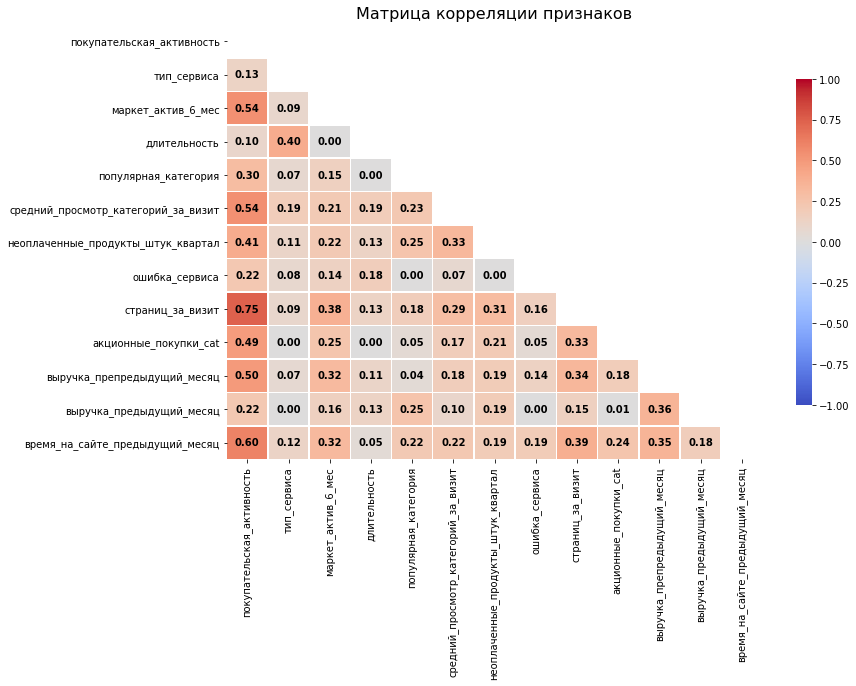

In [64]:
numeric_prototypes_uncorrelated = [
    'маркет_актив_тек_мес',
    'акционные_покупки',
    'страниц_за_визит_cat',
    'разрешить_сообщать',
    'маркет_актив_тек_мес_cat',
    'выручка_текущий_месяц',
    'время_на_сайте_текущий_месяц'
]


merged_df = merged_df.drop(columns=numeric_prototypes_uncorrelated)

interval_cols = [
    'маркет_актив_6_мес',
    'длительность',
    'выручка_препредыдущий_месяц',
    'выручка_предыдущий_месяц',
]


phik_matrix = merged_df.drop('id', axis=1).phik_matrix(interval_cols=interval_cols)
mask = np.triu(np.ones_like(phik_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(
    phik_matrix,
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",     
    mask=mask,          
    linewidths=0.5,     
    cbar_kws={"shrink": 0.75},  
    vmin=-1, vmax=1,     
    annot_kws={"size": 10, "weight": "bold", "color": "black"}  
)

plt.title("Матрица корреляции признаков", fontsize=16)
plt.show()

**В ходе корреляционного анализа из датасета были исключены признаки с низкой корреляцией с целевой переменной. Была устранена проблема мультиколлинеарности и удалены данные, которые могли создавать шум.**

#### Шаг 6. Использование пайплайнов

##### Подготовка данных

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    merged_df.drop(['id','покупательская_активность'], axis=1),
    merged_df['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = merged_df['покупательская_активность'])

X_train.shape, X_test.shape

((972, 12), (324, 12))

In [66]:
X_train.head()

,тип_сервиса,маркет_актив_6_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,акционные_покупки_cat,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,время_на_сайте_предыдущий_месяц
507,стандарт,5.5,510,мелкая бытовая техника и электроника,2,4,7,16,низкая доля,4347.0,5170.5,20
10,стандарт,5.1,199,техника для красоты и здоровья,4,5,2,3,низкая доля,4597.0,6400.0,11
533,стандарт,4.3,997,мелкая бытовая техника и электроника,5,1,3,11,низкая доля,4626.0,4113.0,13
1213,стандарт,5.6,342,кухонная посуда,2,7,5,8,высокая доля,5269.0,4930.0,14
364,премиум,3.6,873,товары для детей,3,2,2,5,низкая доля,4691.0,3716.0,10


In [67]:
# создаём списки с названиями признаков
ohe_columns = [ 'популярная_категория']
ord_columns = ['тип_сервиса', 'акционные_покупки_cat']

In [68]:
num_columns = ['маркет_актив_6_мес', 'длительность', 'средний_просмотр_категорий_за_визит', 
               'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_препредыдущий_месяц',
               'выручка_предыдущий_месяц', 'время_на_сайте_предыдущий_месяц']
               
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'],
                    ['низкая доля', 'высокая доля']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

#####  Создание пайплана обучения моделей

В целевой переменной присутствует дисбаланс классов. Для его устранения воспользуемся SMOTETomek.

In [69]:
smt = SMOTETomek(random_state=RANDOM_STATE);

pipe_final = Pipeline([ 
    ('preprocessor', data_preprocessor),  
    ('over', smt), 
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE)) 
])

Теперь необходимо найти оптимальные гиперпараметры.

In [70]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__min_samples_leaf': range(2, 10),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'models__weights': ['uniform', 'distance'],
        'models__p': [1, 2],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': np.logspace(-2, 2, 10),  
        'models__penalty': ['l1', 'l2'],
        'models__solver': ['liblinear', 'saga'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': [0.1, 1, 10],
        'models__kernel': ['linear', 'rbf', 'poly'],
        'models__gamma': ['scale', 'auto'],
        'models__degree': [2, 3, 4],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

В качестве метрики для данной задачи будем использовать ROC-AUC, поскольку она учитывает как точность (precision), так и полноту (recall), предоставляя общую оценку качества модели без необходимости подбирать оптимальный порог классификации.

In [71]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

##### Поиск лучшей модели

In [72]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [73]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImpu...
                                                            'saga'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': [0.1, 1, 10],
                                         'models__degree': [2, 3, 4],
                                         'models__gamma': ['scale', 'auto'],
                                         'models__kernel': ['linear', 'rbf',
                                                            'poly'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [74]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_params_) 

Лучшая модель и её параметры:

 {'preprocessor__num': StandardScaler(), 'models__solver': 'saga', 'models__penalty': 'l1', 'models__C': 35.93813663804626, 'models': LogisticRegression(random_state=42)}


In [75]:
print('Метрика ROC-AUC для лучшей модели:\n', randomized_search.best_score_) 

Метрика ROC-AUC для лучшей модели:
 0.8933201250837615


In [76]:
y_pred = randomized_search.predict_proba(X_test)
print('Метрика ROC-AUC на тестовой выборке:', roc_auc_score(y_test, y_pred[:, 1]))

Метрика ROC-AUC на тестовой выборке: 0.9137240626137604


In [77]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)

dummy_clf.fit(X_train, y_train)

dummy_predictions = dummy_clf.predict(X_test)
dummy_probabilities = dummy_clf.predict_proba(X_test)[:, 1] 

dummy_roc_auc = roc_auc_score(y_test, dummy_probabilities)
print(f'Метрика ROC-AUC для DummyClassifier: {dummy_roc_auc}')

Метрика ROC-AUC для DummyClassifier: 0.5


**Лучшей моделью оказалась логистическая регрессия со следующими параметрами:**
**StandardScaler(), 'models__solver': 'saga', 'models__penalty': 'l1', 'models__C': 35.93813663804626.**

**На тестовых данных метрика достигла точности 0.893, а на тренировочных 0.914.**

#### Шаг 7. Анализ важности признаков

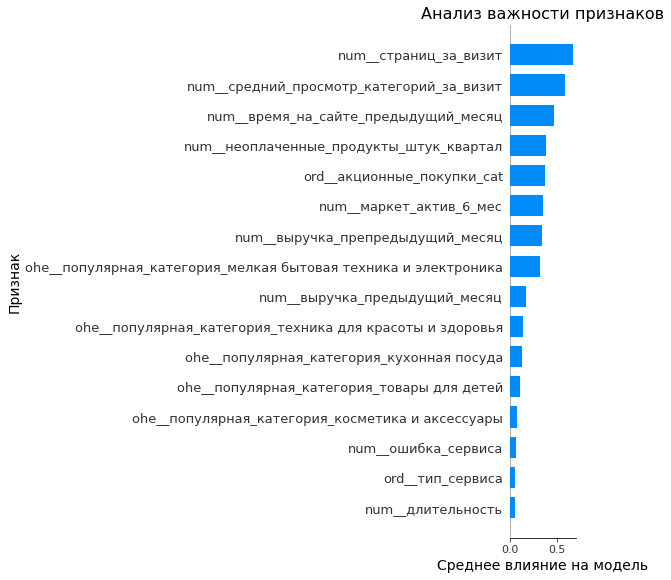

In [78]:
X_train_encoded = randomized_search.best_estimator_['preprocessor'].transform(X_train)
model_best = randomized_search.best_estimator_['models']
explainer = shap.Explainer(model_best, X_train_encoded)
shap_values = explainer(X_train_encoded)

labels = randomized_search.best_estimator_['preprocessor'].get_feature_names_out()

shap.summary_plot(shap_values, features=X_train_encoded, feature_names=labels, plot_type='bar', show=False)
fig, ax = plt.gcf(), plt.gca()

ax.set_title('Анализ важности признаков', fontsize=16)
ax.set_xlabel('Среднее влияние на модель', fontsize=14)
ax.set_ylabel('Признак', fontsize=14)

plt.show()

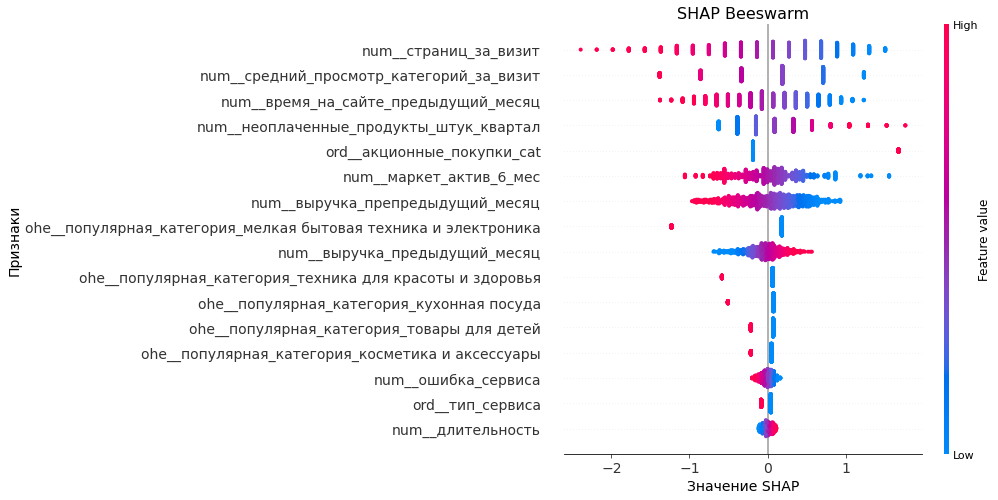

In [79]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=labels)
explainer = shap.Explainer(model_best, X_train_encoded_df)
shap_values = explainer(X_train_encoded_df)

shap.plots.beeswarm(shap_values, max_display=16, show=False)
fig, ax = plt.gcf(), plt.gca()

ax.set_title('SHAP Beeswarm', fontsize=16)
ax.set_xlabel('Значение SHAP', fontsize=14)
ax.set_ylabel('Признаки', fontsize=14)
ax.tick_params(labelsize=14)

plt.show()

Признаки мало значимые для модели:

- длительность;
- тип_сервиса_стандарт;
- ошибка_сервиса;
- популярная_категория_косметика и аксессуары;
- популярная_категория_товары для детей

Сильнее всего влияют следующие признаки:

- страниц_за_визит (пользователи, которые просматривают больше страниц, чаще остаются на сайте);
- средний_просмотр_категорий_за_визит;
- время_на_сайте_предыдущий_месяц
- неоплаченные_продукты_штук_квартал (негативно сказываются на активности пользователя)

Наблюдения можно использовать для разработки таргетированных маркетинговых кампаний. Например, признак страниц_за_визит сильно влияет на целевой, можно сфокусироваться на улучшении пользовательского опыта на сайте.

#### Шаг 8. Сегментация покупателей

##### Сегментация

Объединим датафремы, чтобы посмотреть, что влияет на прибыль компании.

In [80]:
profit = merged_df.merge(money, on='id')

In [81]:
profit.head()

,id,покупательская_активность,тип_сервиса,маркет_актив_6_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,акционные_покупки_cat,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,время_на_сайте_предыдущий_месяц,прибыль
0,215349,снизилась,премиум,4.4,819,товары для детей,4,4,2,5,высокая доля,4472.0,5216.0,12,4.16
1,215350,снизилась,стандарт,4.9,539,домашний текстиль,5,2,1,5,низкая доля,4826.0,5457.5,8,3.13
2,215351,снизилась,стандарт,3.2,896,товары для детей,5,0,6,4,высокая доля,4793.0,6158.0,11,4.87
3,215352,снизилась,стандарт,5.1,1064,товары для детей,3,2,3,2,высокая доля,4594.0,5807.5,8,4.21
4,215353,снизилась,стандарт,3.3,762,домашний текстиль,4,1,1,4,низкая доля,5124.0,4738.5,10,3.95


In [82]:
print(merged_df.shape)
print(money.shape)
print(profit.shape)

(1296, 14)
(1297, 2)
(1296, 15)


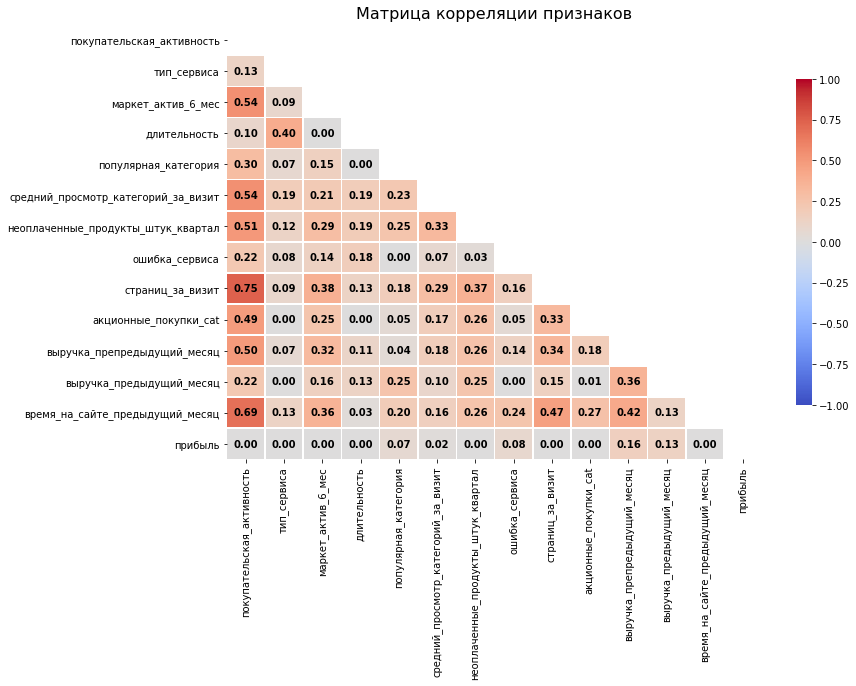

In [83]:
interval_cols = [
    'маркет_актив_6_мес',
    'длительность',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'выручка_препредыдущий_месяц',
    'выручка_предыдущий_месяц',
    'время_на_сайте_предыдущий_месяц',
    'прибыль'
]


phik_matrix = profit.drop('id', axis=1).phik_matrix(interval_cols=interval_cols)
mask = np.triu(np.ones_like(phik_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(
    phik_matrix,
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",     
    mask=mask,          
    linewidths=0.5,     
    cbar_kws={"shrink": 0.75},  
    vmin=-1, vmax=1,     
    annot_kws={"size": 10, "weight": "bold", "color": "black"}  
)

plt.title("Матрица корреляции признаков", fontsize=16)
plt.show()

На прибыль признаки влияют очень слабо. Влияют только популярная_категория, ошибка_сервиса, выручка_за_предпредыдущий_месяц и выручка_за_предыдущий_месяц.

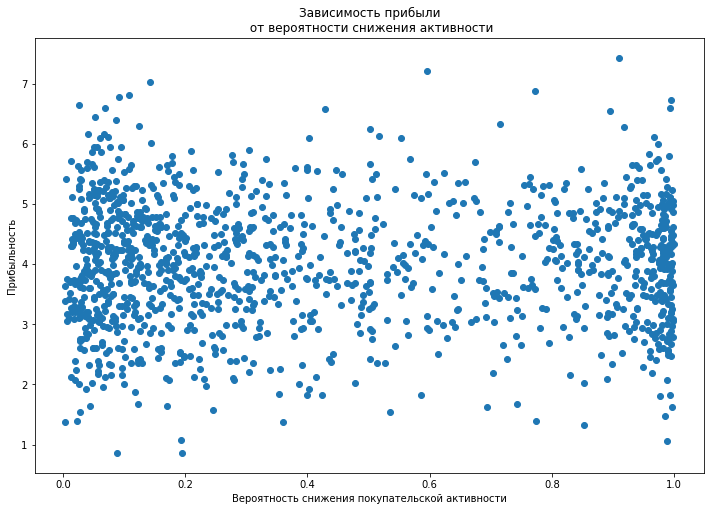

In [84]:
best_model = randomized_search.best_estimator_['models']
preprocessor = randomized_search.best_estimator_['preprocessor']

X_features = profit.drop(['прибыль', 'id', 'покупательская_активность'], axis=1)
X_processed = preprocessor.transform(X_features)

probabilities = best_model.predict_proba(X_processed)[:, 1]

profit['вероятность снижения активности'] = probabilities


plt.figure(figsize=(12, 8))
plt.scatter(profit['вероятность снижения активности'], profit['прибыль'])
plt.title('Зависимость прибыли\n от вероятности снижения активности')
plt.xlabel('Вероятность снижения покупательской активности')
plt.ylabel('Прибыльность')
plt.show()

Таким образом, можно выделить несколько категорий покупателей:

1) Группа с высокой вероятностью снижения активности и низкой прибыльностью. Данная  группа расположена в правой части графика  и имеет низкие значения прибыльности (от 1 до 3). Покупатели в этой группе перестают совершать покупки, что ведет к низким доходам.

2) Группа с низкой вероятностью снижения активности и высокой прибыльностью. Эта группа расположена в левой части графика  и имеет высокие значения прибыльности (от 4 до 7). Покупатели в этой группе активно совершают покупки и приносят значительный доход. Нужно поддерживать и развивать программы лояльности для этих покупателей. Предлагать эксклюзивные товары и услуги для удержания их интереса. Мониторить обратную связь и улучшать пользовательский опыт.

3) Группа с высокой вероятностью снижения активности и высокой прибыльностью. Группа расположена в правой части графика  и имеет высокие значения прибыльности (от 4 до 7). Несмотря на высокую прибыльность, эти покупатели находятся в зоне риска снижения активности. Это может означать, что они могут скоро перестать совершать покупки, что приведет к значительной потере доходов. Возможно, потребуется внедрить программы удержания для этих покупателей, чтобы предотвратить снижение их активности.

4) Группа с низкой вероятностью снижения активности и низкой прибыльность. Эта группа расположена в левой части графика и имеет низкие значения прибыльности (от 1 до 3). Эти покупатели не собираются снижать свою активность, но их прибыльность остается низкой. Это может указывать на то, что они совершают небольшие или нерегулярные покупки. Можно предложить персонализированные рекомендации товаров, чтобы увеличить сумму покупки.

#####  Анализ сегмента

Для анализа возьмем сегмент 3 (группа с высокой вероятностью снижения активности и высокой прибыльностью), так как потеря этих клиентов сильно скажется на доходах компании.

In [85]:
segment_3 = profit[
    (profit['вероятность снижения активности'] > 0.7) &  
    (profit['прибыль'] >= 4)                             
]

In [86]:
segment_3_summary = segment_3.describe().T
print(segment_3_summary,'\n')

segment_3_size = len(segment_3)
total_customers = len(profit)
segment_3_share = segment_3_size / total_customers * 100

print(f"Размер сегмента: {segment_3_size}")
print(f"Доля сегмента от общего числа покупателей: {segment_3_share:.2f}%")

                                     count           mean         std  \
id                                   216.0  215650.064815  291.992363   
маркет_актив_6_мес                   216.0       3.568981    1.008019   
длительность                         216.0     605.217593  237.216914   
средний_просмотр_категорий_за_визит  216.0       2.310185    1.034785   
неоплаченные_продукты_штук_квартал   216.0       4.050926    2.210377   
ошибка_сервиса                       216.0       3.976852    1.920373   
страниц_за_визит                     216.0       4.365741    2.113199   
выручка_препредыдущий_месяц          216.0    4609.763889  250.411930   
выручка_предыдущий_месяц             216.0    4990.337963  791.259004   
время_на_сайте_предыдущий_месяц      216.0      10.236111    2.870020   
прибыль                              216.0       4.726065    0.589515   
вероятность снижения активности      216.0       0.911072    0.082519   

                                               min

In [87]:
segment_3.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'маркет_актив_6_мес',
       'длительность', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'акционные_покупки_cat',
       'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц',
       'время_на_сайте_предыдущий_месяц', 'прибыль',
       'вероятность снижения активности'],
      dtype='object')

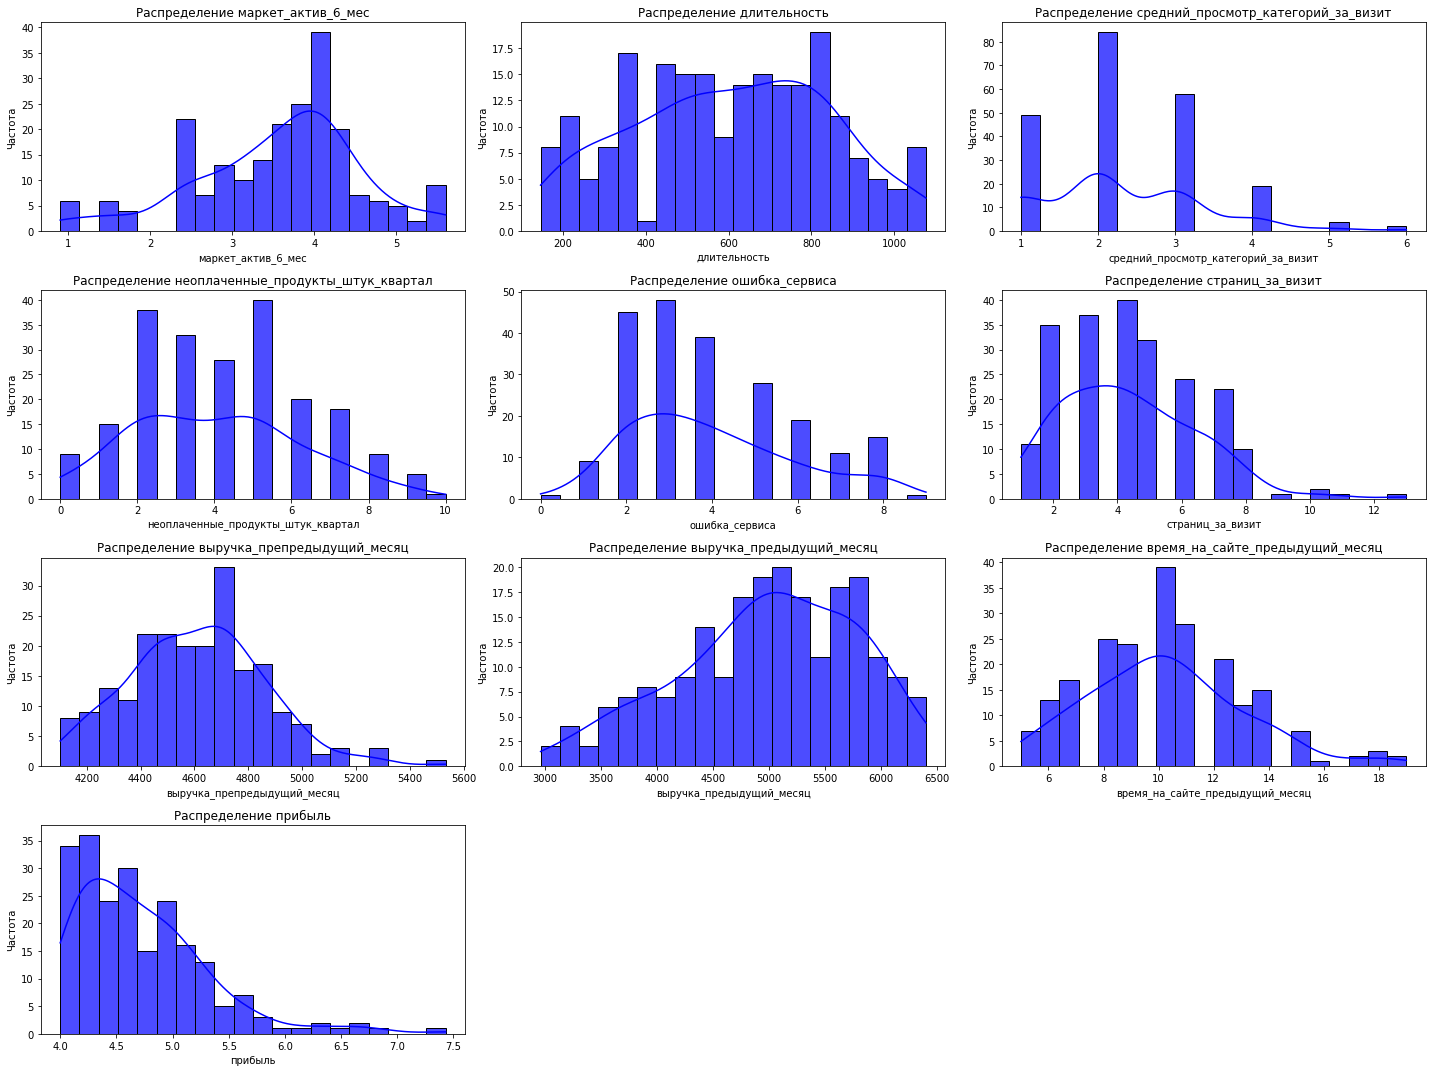

In [88]:
features = segment_3.select_dtypes(include=[np.number]).columns.tolist()  
features.remove('id')
features.remove('вероятность снижения активности')

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, start=1):
    plt.subplot((len(features) // 3) + 1, 3, i)   
    sns.histplot(segment_3[feature], kde=True, bins=20, color='blue', alpha=0.7)
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Для данной категории количество коммуникаций с клиентом в основном равно 4, длительность распределена практически равномерно, всего просматривают в основном не более трех категорий, количество неоплаченных товаров распределено почти равномерно, встречается в большинстве случаев до 4 ошибок сервиса. Пользователи из этой категории посещают до 10 страниц, выручка за препредыдущий месяц сосредоточена в диапазоне от 4200 до 5200, а за предыдущий от 3000 до 6500, пользователи за предыдущий месяц провели на сайте в среднем 10 минут. Прибыль составляет от 4 до 6. 

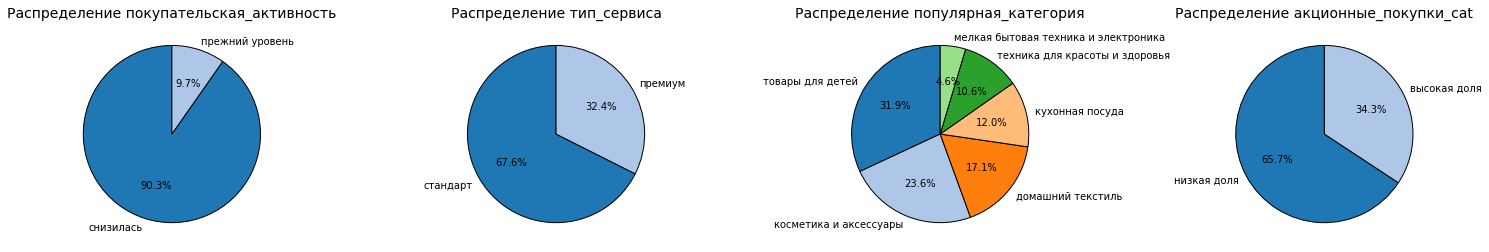

In [89]:
categorical_features = segment_3.select_dtypes(include=['object']).columns.tolist()

fig, axes = plt.subplots(1, len(categorical_features), figsize=(5 * len(categorical_features), 6))

for i, column in enumerate(categorical_features):
    ax = axes[i] if len(categorical_features) > 1 else axes  
    cat_variable_visualization(segment_3, column, f"Распределение {column}", ax)

plt.tight_layout()
plt.show()

В большинстве случаев пользователи пользуется стандартным типом сервиса (67.6%), наиболее популярной является категория товаров для детей, преобладает низка доля акционных покупок.

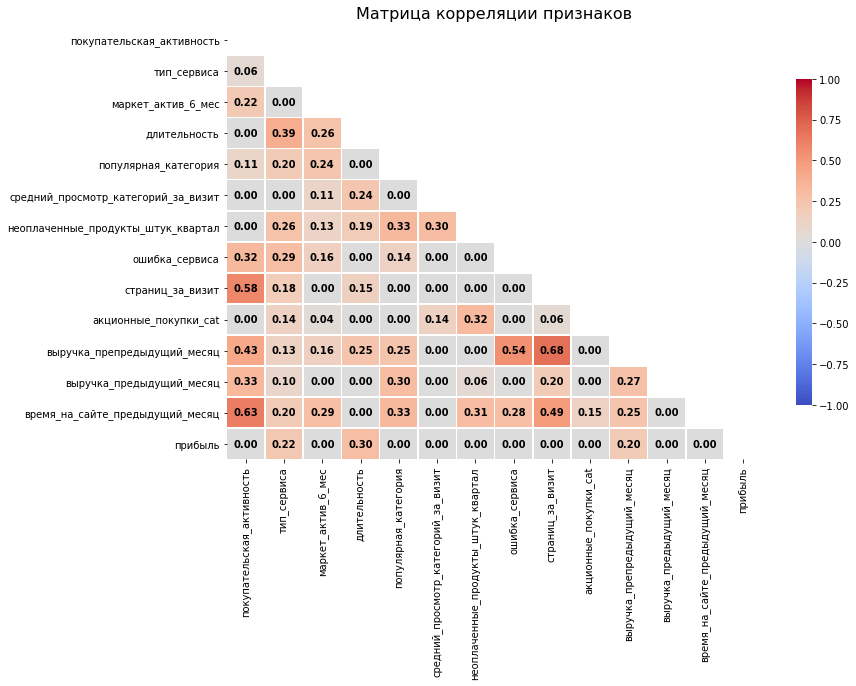

In [90]:
interval_cols = [
    'маркет_актив_6_мес',
    'длительность',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'выручка_препредыдущий_месяц',
    'выручка_предыдущий_месяц',
    'время_на_сайте_предыдущий_месяц',
    'прибыль'
]


phik_matrix = segment_3.drop(['id', 'вероятность снижения активности'], axis=1).phik_matrix(interval_cols=interval_cols)
mask = np.triu(np.ones_like(phik_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(
    phik_matrix,
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",     
    mask=mask,          
    linewidths=0.5,     
    cbar_kws={"shrink": 0.75},  
    vmin=-1, vmax=1,     
    annot_kws={"size": 10, "weight": "bold", "color": "black"}  
)

plt.title("Матрица корреляции признаков", fontsize=16)
plt.show()

В данном сегменте на целевой признак наиболее сильное воздействие оказывают признаки: страниц_за_визит, выручка_препредыдущий_месяц, время_на_сайте_предыдущий_месяц.

Сегментация покупателей:

Группа с высокой вероятностью снижения активности и низкой прибыльностью: Эти покупатели проявляют признаки низкой активности и низкой прибыльности. Они вряд ли будут совершать покупки в будущем, что приведет к снижению доходов.

Группа с низкой вероятностью снижения активности и высокой прибыльностью: Покупатели в этой группе активно совершают покупки и приносят значительный доход. Рекомендуется развивать программы лояльности, предложить эксклюзивные товары и услуги для удержания интереса.

Группа с высокой вероятностью снижения активности и высокой прибыльностью: Несмотря на высокую прибыльность, покупатели в этой группе находятся в зоне риска. Необходимо внедрить программы удержания и мониторинг их активности, чтобы не потерять прибыль.

Группа с низкой вероятностью снижения активности и низкой прибыльностью: Эти покупатели не снижают свою активность, но их прибыльность остается низкой. 

Сегмент 3 (группа с высокой вероятностью снижения активности и высокой прибыльностью) для дополнительного исследования:

Для анализа выбран сегмент с высокой вероятностью снижения активности и высокой прибыльностью. Потеря этих клиентов сильно скажется на доходах компании, поэтому необходимо уделить внимание этому сегменту.

Поскольку пользователи этого сегмента не просматривают в основном более трех категорий товаров, можно предложить персонализированные рекомендации на основе их предпочтений. Это может помочь увеличить количество просмотров страниц и удержать интерес к сайту.

Для пользователей, которые посещают до 10 страниц, важно упростить навигацию и улучшить поисковые функции. Сделать сайт более удобным и интуитивно понятным поможет увеличить среднее время на сайте.

Для пользователей с высоким уровнем прибыльности важно предложить бонусы, скидки или эксклюзивные предложения. Это может быть как накопительная система баллов, так и эксклюзивные скидки на товары, популярные в их категории (например, товары для детей).

Поскольку выручка за предыдущие месяцы колеблется в диапазоне от 3000 до 6500, можно предложить дополнительные персонализированные предложения для пользователей с высокой выручкой, например, премиум-категории товаров или эксклюзивные услуги.

#### Шаг 9. Общий вывод

**Описание задачи**

Необходимо разработать решение, которое позволит увеличить покупательскую активность клиентов.

Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

Нужно собрать данные по клиентам по следующим группам:

Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.


Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.


В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.


Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.


**Исходные данные и предобработка** 

market_file.csv. Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


market_money.csv. Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.


- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.


market_time.csv. Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.


- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
минут — значение времени, проведённого на сайте, в минутах.


money.csv. Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.


- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.


В ходе предобработки было выполнено:

- изменение названия столбцов;
- была сделана проверка на наличие пропусков и дубликатов;

**Поиск и описание лучшей модели**

Использовались различные методы подготовки данных. Был использован RandomizedSearchCV, использовались четыре модели (KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), SVC()), были рассмотрены различные параметры этих моделей. 

Лучшая модель и её параметры:

 {'preprocessor__num': StandardScaler(), 'models__solver': 'saga', 'models__penalty': 'l1', 'models__C': 35.93813663804626, 'models': LogisticRegression(random_state=42)}
 
Для детального анализа был выбран сегмент с высокой вероятностью снижения активности и высокой прибыльностью. Потеря этих клиентов сильно скажется на доходах компании, поэтому необходимо уделить внимание этому сегменту.

Поскольку пользователи этого сегмента не просматривают в основном более трех категорий товаров, можно предложить персонализированные рекомендации на основе их предпочтений. Это может помочь увеличить количество просмотров страниц и удержать интерес к сайту.

Для пользователей, которые посещают до 10 страниц, важно упростить навигацию и улучшить поисковые функции. Сделать сайт более удобным и интуитивно понятным поможет увеличить среднее время на сайте.

Для пользователей с высоким уровнем прибыльности важно предложить бонусы, скидки или эксклюзивные предложения. Это может быть как накопительная система баллов, так и эксклюзивные скидки на товары, популярные в их категории (например, товары для детей).

Поскольку выручка за предыдущие месяцы колеблется в диапазоне от 3000 до 6500, можно предложить дополнительные персонализированные предложения для пользователей с высокой выручкой, например, премиум-категории товаров или эксклюзивные услуги.